face3d.shape (3, 68)


<IPython.core.display.Javascript object>


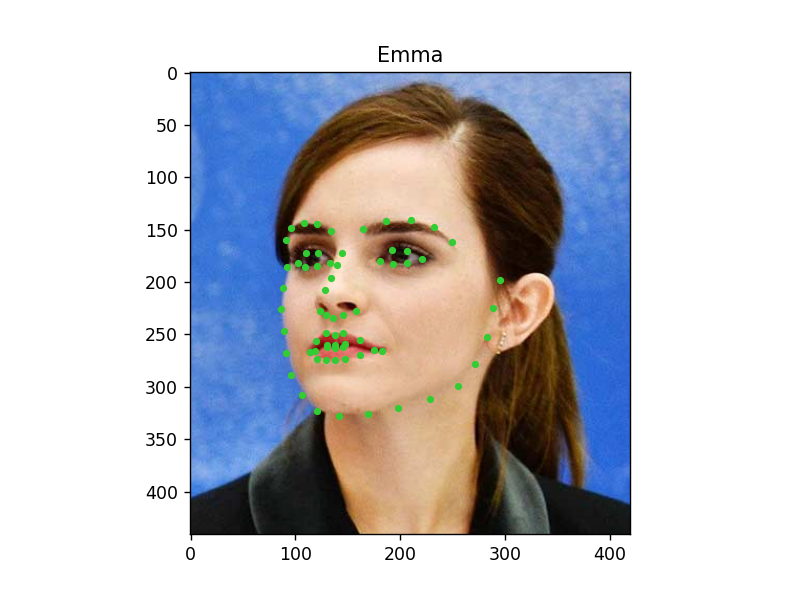

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, atan2, sqrt,pi
%matplotlib notebook

img_name = 'emma_watson'
face2d = np.load(img_name + '.npy')
face2d = face2d.astype('float32')
face3d = np.load('basel_68_pts.npy')
# Do not change the following two lines
face3d[1,:] *= -1
face3d[2,:] *= -1
print('face3d.shape', face3d.shape)

# TODO1: Display the 2D landmarks
# enter your code here 
fig=plt.figure()
emma=cv2.imread(img_name+ '.jpg')
plt.scatter(face2d[0],face2d[1],c='limegreen',s=10)
plt.imshow(emma[:,:,::-1])
plt.title('Emma')
plt.show()

In [2]:
# TODO 2: Pose estimation
# enter your code here
height,width=emma.shape[:2]
f=max(height,width)
cx,cy=(width/2),(height/2)
k=np.array([[f,0,cx],[0,f,cy],[0,0,1]])
#calculate [R|t]
_,rotvec,transvec=cv2.solvePnP(face3d.T,face2d.T,k,None)
#vector to matrix
r,_=cv2.Rodrigues(rotvec)
print(f'Rotate matrix:{r}')
l=sqrt(r[0,0]**2+r[1,0]**2)
print(f'l:{l}')
if l>=1e-6:
    pitch,yaw,roll=atan2(r[2,1],r[2,2]),atan2(-r[2,0],l),atan2(r[1,0],r[0,0])
else:
    pitch,yaw,roll=-atan2(r[1,2],r[1,1]),atan2(-r[2,0],l),0
print(f'pirch:{(pitch*180/pi)} degrees, yaw:{(yaw*180/pi)} degrees, roll:{(roll*180/pi)} degrees')    

Rotate matrix:[[ 0.96681583 -0.07612654  0.24386862]
 [ 0.06290507  0.9961189   0.06156375]
 [-0.24760878 -0.04418023  0.96785226]]
l:0.968860100068908
pirch:-2.6136064788718563 degrees, yaw:14.33605692718335 degrees, roll:3.7226550223346324 degrees


In [3]:
def projection_to_2d(face3d,R,k,t):
    #[R|t]
    extrinsic=np.hstack((R,t))
    mi=np.vstack((face3d,np.ones((1,face3d.shape[1]))))
    Mi=k@extrinsic@mi
    face2d=np.vstack((Mi[0]/Mi[2],Mi[1]/Mi[2]))
    return face2d

<IPython.core.display.Javascript object>


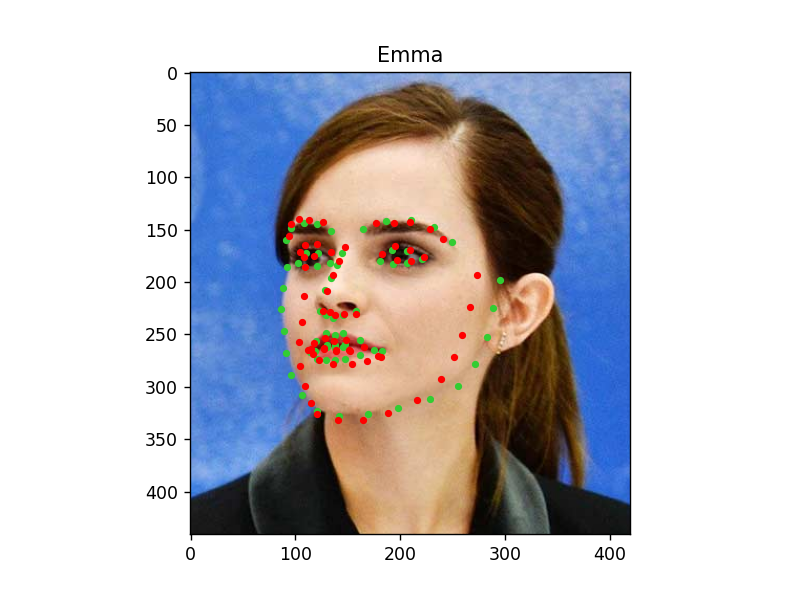

In [9]:
# TODO 3: Compute the reprojected 2D landmarks, face2d_repr
# enter your code here
fig=plt.figure()
new_face2d=projection_to_2d(face3d,r,k,transvec)
plt.scatter(face2d[0],face2d[1],c='limegreen',s=10)
plt.scatter(new_face2d[0],new_face2d[1],c='r',s=10)
plt.imshow(emma[:,:,::-1])
plt.title('Emma')
plt.show()

In [5]:
# TODO 4: Print the reprojection error
# enter your code here
face2d_repr=np.sum(np.sqrt((new_face2d[0]-face2d[0])**2+(new_face2d[1]-face2d[1])**2))/face2d.shape[1]
print(f'Orginal reprojection error:{face2d_repr}')

Orginal reprojection error:8.262862360060064


Rotate matrix:[[ 0.95534841 -0.05956619  0.28941542]
 [ 0.02060077  0.99051373  0.13586082]
 [-0.29476266 -0.12383223  0.94751283]]
l:0.9555704982020181
pirch:-7.445891805238448 degrees, yaw:17.14330569529926 degrees, roll:1.2353130657460796 degrees


<IPython.core.display.Javascript object>


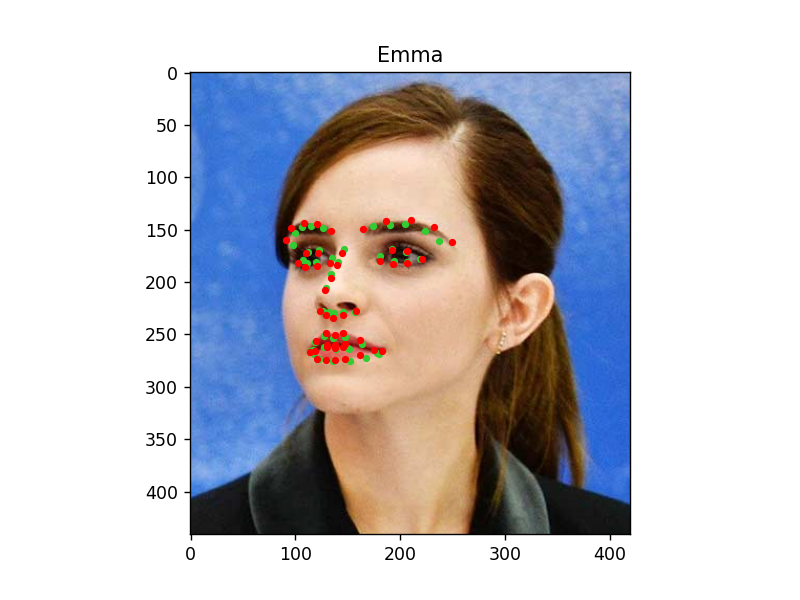

new reprojection error:4.220630272314532


In [10]:
# TODO 5: Repeat TODO 2 ~ TODO 4 using 51 landmarks
# enter your code here
_,rotvec_,transvec_=cv2.solvePnP(face3d[:,17:].T,face2d[:,17:].T,k,None)
r_,_=cv2.Rodrigues(rotvec_)
print(f'Rotate matrix:{r_}')
l=sqrt(r_[0,0]**2+r_[1,0]**2)
print(f'l:{l}')
if l>=1e-6:
    pitch,yaw,roll=atan2(r_[2,1],r_[2,2]),atan2(-r_[2,0],l),atan2(r_[1,0],r_[0,0])
else:
    pitch,yaw,roll=-atan2(r_[1,2],r_[1,1]),atan2(-r_[2,0],l),0
print(f'pirch:{(pitch*180/pi)} degrees, yaw:{(yaw*180/pi)} degrees, roll:{(roll*180/pi)} degrees')    
face2d_51points=projection_to_2d(face3d[:,17:],r_,k,transvec_)
fig=plt.figure()
plt.scatter(face2d_51points[0],face2d_51points[1],c='limegreen',s=10)
plt.scatter(face2d[0,17:],face2d[1,17:],c='r',s=10)
plt.imshow(emma[:,:,::-1])
plt.title('Emma')
plt.show()
face2d_repr_51points=np.sum(np.sqrt((face2d_51points[0]-face2d[0,17:])**2+(face2d_51points[1]-face2d[1,17:])**2))/face2d_51points.shape[1]
print(f'new reprojection error:{face2d_repr_51points}')

In [7]:
# Question 1: Which is better to perform pose estimation, using 68 points or using 51 points? 
# enter your answer here
#因為在找臉部的點時，可能會因為臉的角度導致點對不上，
#用51個點剛好可以把輪廓的部分去除掉，單純檢測眼鼻嘴和眉毛，減少labelmark matching problem.

<IPython.core.display.Javascript object>


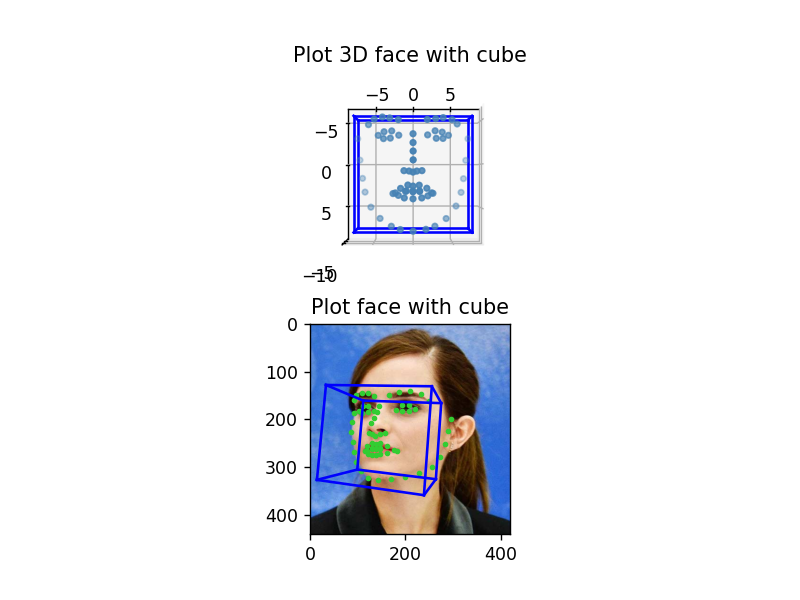

Text(0.5, 1.0, 'Plot face with cube')

In [8]:
# TODO 6: Augmented reality
# enter your code here
x_min,x_max=np.min(face3d[0]),np.max(face3d[0])
y_min,y_max=np.min(face3d[1]),np.max(face3d[1])
z_min,z_max=np.min(face3d[2]),np.max(face3d[2])
fig = plt.figure()
ax = fig.add_subplot(2,1,1,projection='3d')
ax.scatter3D(face3d[0],face3d[1],face3d[2],c='steelblue',marker='o',s=10)
vertices = np.array([[x_min, y_min, z_min],
                     [x_min, y_min, z_max],
                     [x_min, y_max, z_min],
                     [x_min, y_max, z_max],
                     [x_max, y_min, z_min],
                     [x_max, y_min, z_max],
                     [x_max, y_max, z_min],
                     [x_max, y_max, z_max]])
edges = [(0, 1), (0, 2), (0, 4), (1, 3), (1, 5), (2, 3), (2, 6), (3, 7), (4, 5), (4, 6), (5, 7), (6, 7)]
for edge in edges:
    ax.plot(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], c='b')
ax.view_init(elev=-90,azim=-90)
ax.set_xlim([x_min-1,x_max+1])
ax.set_ylim([y_min-1,y_max+1])
ax.set_zlim([z_min-1,z_max+1])
plt.show()
plt.title('Plot 3D face with cube')
ax2=fig.add_subplot(2,1,2)
cube2d=projection_to_2d(vertices.T,r,k,transvec)
for edge in edges:
    ax2.plot(cube2d[0, edge], cube2d[1, edge], c='b')
ax2.scatter(face2d[0],face2d[1],c='limegreen',s=5)
ax2.imshow(emma[:,:,::-1])

plt.title('Plot face with cube')